<center><h1>Capstone Project Creation</h1></center>
<center><h3>IBM SkillsBuild Europe Delivery - Data Analytics</h3></center>


# Pre-requisite

* Understanding of Python, Power BI or Tableau
* Understanding of Data Cleaning 
* Understanding Data Visualization

#### Level of Exercise: Intermediate

#### Duration: approximately 3 hours

#### All exercises are required for a successful completion of this project

Please return this file with the answers in it to englishtrainer@skillup.online on or before the 22nd of December 2022.

### Data Analytics of Airbnb Data:

#### Objective:

In this exericise, you will be performing Data Analytics on an Open Dataset dataset coming from Airbnb. Some of the tasks include
- Data Cleaning.
- Data Transformation
- Data Visualization.

#### Overview of Airbnb Data:

People's main criteria when visiting new places are reasonable accommodation and food. Airbnb (Air-Bed-Breakfast) is an online marketplace created to meet this need of people by renting out their homes for a short term. They offer this facility at a relatively lower price than hotels. Further people worldwide prefer the homely and economical service offered by them. They offer services across various geographical locations

#### Dataset Source

YOu can get the dataset for this assessment using the following link: https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata

This dataset contains information such as the neighborhood offering these services, room type, price,avaliabilty, reviews, service fee, cancellation policy and rules to use the house. This analysis will help airbnb in improving its services.  

So all the best for your Data Analytics Journey on Airbnb data!!!

## Task 1: Data Loading (Python)

1. Read the csv file and load it into a pandas dataframe.
2. Display the first five rows of your dataframe.
3. Display the data types of the columns.

In [140]:
## Read the csv file
import os
import pandas as pd

# Development done on Linux environment - set current directory to location of data file.
os.chdir("/home/chris/anaconda3/envs/sb-dataanalytics/capstone")

# Loading raw Airbnb data from kaggle
# The last columns 'license' containing unrecognized characters which is being ignored. 
airbnb_data = pd.read_csv("Airbnb_Open_Data.csv", usecols = [i for i in range(25)])

In [141]:
## Display the first 5 rows
airbnb_data.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


In [142]:
## Display the data types
airbnb_data.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

## Task 2a: Data Cleaning (Any Tool)

1. Drop some of the unwanted columns. These include `host id`, `id`, `country` and `country code` from the dataset. 
2. State the reason for not including these columns for your Data Analytics.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots before and after the elimination of the columns.

In [143]:
# The following columns will be removed:
# id            - We do not need the unique identifier of each row
# host id       - We do not need unique identifier for the host
# country       - All data is in US. Column is redundant
# country code  - All data is in US. Unique identifier is redundant

columns_to_remove = ["id", "host id", "country", "country code"]

# Perform inplace as we do not need copy of the data frame
airbnb_data.drop(columns=columns_to_remove, inplace=True)

## Task 2b: Data Cleaning (Python)

- Check for missing values in the dataframe and display the count in ascending order. **If the values are missing, impute the values as per the datatype of the columns.**
- Check whether there are any duplicate values in the dataframe and, if present, remove them.
- Display the total number of records in the dataframe before and after removing the duplicates.

In [144]:
## Check for missing values in the dataframe and display the count in ascending order.
airbnb_data.isna().sum().sort_values(ascending=False)

house_rules                       52131
last review                       15893
reviews per month                 15879
availability 365                    448
minimum nights                      409
host name                           406
review rate number                  326
calculated host listings count      319
host_identity_verified              289
service fee                         273
NAME                                250
price                               247
Construction year                   214
number of reviews                   183
instant_bookable                    105
cancellation_policy                  76
neighbourhood group                  29
neighbourhood                        16
long                                  8
lat                                   8
room type                             0
dtype: int64

In [145]:
# First get a count of rows before we remove duplicates
count_rows_before = len(airbnb_data.axes[0])

## Check whether there are any duplicate values in the dataframe and if present remove them.
airbnb_data.drop_duplicates(keep="last", inplace=True)

In [146]:
## Display the total number of records in the dataframe after removing the duplicates.
count_rows_after = len(airbnb_data.axes[0])

# Output the before and after count to the user
print("Count of rows when processing duplicates in the data frame:")
print(f"Before removing duplicates: {count_rows_before}")
print(f"After removing duplicates : {count_rows_after}")

Count of rows when processing duplicates in the data frame:
Before removing duplicates: 102599
After removing duplicates : 99163


## Task 3: Data Transformation (Any Tool)


- Rename the column `availability 365` to `days_booked`
- Convert all column names to lowercase and replace the spaces in the column names with an underscore "_".
- Remove the dollar sign and comma from the columns `price` and `service_fee`. If necessary, convert these two columns to the appropriate data type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [147]:
## Rename the column.
airbnb_data.rename(columns={"availability 365": "days_booked"}, inplace=True)

In [148]:
## Convert all column names to lowercase and replace the spaces with an underscore "_"
new_column_names = {}

# Iterate through each column to build the new dictionary of amended names
for column in airbnb_data.columns:
    new_column_names[column] = column.lower().replace(" ", "_")

airbnb_data.rename(columns=new_column_names, inplace=True)

In [149]:
## Remove the dollar sign and comma from the columns. If necessary, convert these two columns to the appropriate data type.

# First remove the '$' character from the strings in the columns. The ',' character should also be removed
# Only the following two columns need changing
airbnb_data["price"] = airbnb_data["price"].str.replace("$", "")
airbnb_data["price"] = airbnb_data["price"].str.replace(",", "")
airbnb_data["service_fee"] = airbnb_data["service_fee"].str.replace("$", "")
airbnb_data["service_fee"] = airbnb_data["service_fee"].str.replace(",", "")

# The columns should only contain numbers, hence we can attempt the conversion
airbnb_data["price"] = airbnb_data["price"].astype(float)
airbnb_data["service_fee"] = airbnb_data["service_fee"].astype(float)

/tmp/ipykernel_34077/1202026920.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_data["price"] = airbnb_data["price"].str.replace("$", "")
/tmp/ipykernel_34077/1202026920.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  airbnb_data["service_fee"] = airbnb_data["service_fee"].str.replace("$", "")


### Task 4: Exploratory Data Analysis (Any Tool)

- List the count of various room types avaliable in the dataset.
- Which room type has the most strict cancellation policy?
- List the average price per neighborhood group, and highlight the most expensive neighborhood to rent from.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [150]:
## List the count of various room types available with Airbnb
airbnb_data.groupby("room_type").size()

room_type
Entire home/apt    52003
Hotel room           115
Private room       44895
Shared room         2150
dtype: int64

In [151]:
## Which room type adheres to more strict cancellation policy
airbnb_data.groupby("room_type")["cancellation_policy"].apply(lambda x: (x=="strict").sum()).reset_index(name="count").sort_values("count", ascending=False)

,room_type,count
0,Entire home/apt,17241
2,Private room,14937
3,Shared room,718
1,Hotel room,34


In [152]:
## List the prices by neighborhood group and also mention which is the most expensive neighborhood group for rentals
airbnb_data.groupby("neighbourhood_group").agg({"price": ["mean", "max"]}).reset_index()

neighbourhood_group       price        
                             mean     max
0               Bronx  626.614412  1200.0
1            Brooklyn  626.428192  1200.0
2           Manhattan  622.683781  1200.0
3              Queens  629.712735  1200.0
4       Staten Island  626.431843  1200.0
5             brookln  580.000000   580.0
6            manhatan  460.000000   460.0

## Task 5a: Data Visualization (Any Tool)

- Create a horizontal bar chart to display the top 10 most expensive neighborhoods in the dataset.
    - Create another chart with the 10 cheapest neighborhoods in the dataset.
- Create a box and whisker chart that showcases the price distribution of all listings split by room type.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

In [181]:
import matplotlib as mpl
import seaborn as sb

# For each neighbourhood, we will use the median of the price
neighbourhoods_mean_price = airbnb_data.groupby("neighbourhood")[["price"]].median().reset_index()
# Now calculate the 10 most expensive and 10 cheapest neighbourhoods
expensive_neighbourhoods = neighbourhoods_mean_price.sort_values("price", ascending=False).head(10)
cheapest_neighbourhoods = neighbourhoods_mean_price.sort_values("price", ascending=True).head(10)

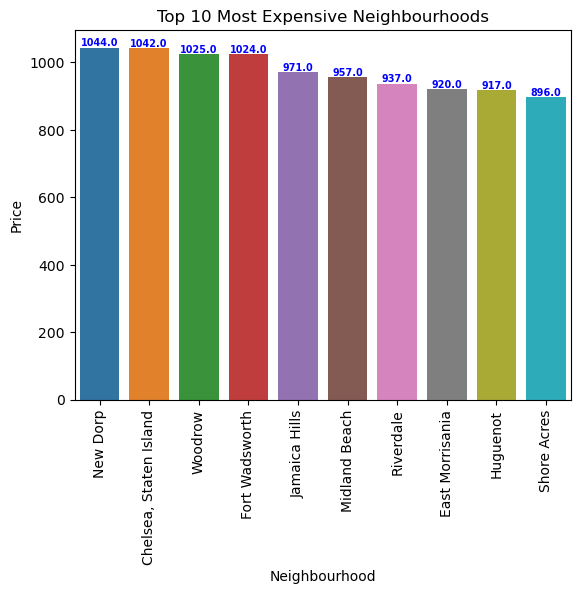

In [197]:
# Create the bar graph for neighbourhood vs price
expensive_graph = sb.barplot(data=expensive_neighbourhoods, x="neighbourhood", y="price")

# The labels are unreadable unless we rotate them 90 degrees
for item in expensive_graph.get_xticklabels():
    item.set_rotation(90)

# Ensure proper labels and title
expensive_graph.set(xlabel='Neighbourhood', ylabel='Price')
expensive_graph.set_title("Top 10 Most Expensive Neighbourhoods")

# Get the price values as an array for us to manipulate when adding to the graph
price_values = expensive_neighbourhoods.price.values

# Add it to the plot
pos = range(len(price_values))
for tick,label in zip(pos, expensive_graph.get_xticklabels()):
    expensive_graph.text(pos[tick],  # x position
                       price_values[tick] + 5, # y position
                       str(price_values[tick]),  # display the median value
                       horizontalalignment='center',
                       size='x-small',
                       color='b',
                       weight='semibold')

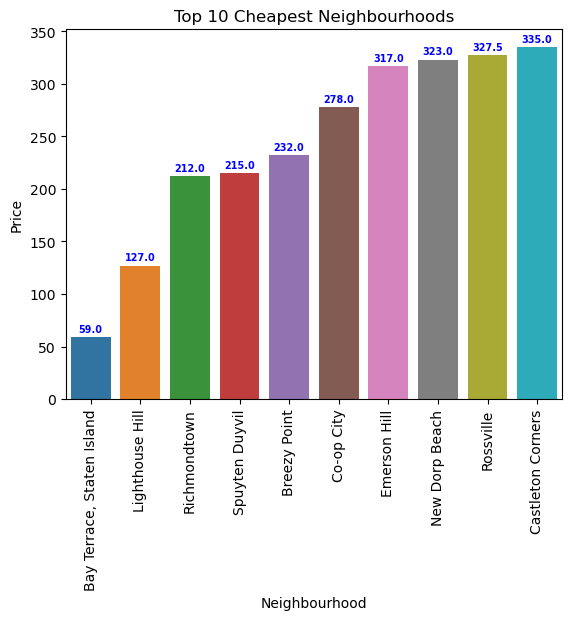

In [196]:
# Create the bar graph for neighbourhood vs price
cheapest_graph = sb.barplot(data=cheapest_neighbourhoods, x="neighbourhood", y="price")

# The labels are unreadable unless we rotate them 90 degrees
for item in cheapest_graph.get_xticklabels():
    item.set_rotation(90)

# Ensure proper labels and title
cheapest_graph.set(xlabel='Neighbourhood', ylabel='Price')
cheapest_graph.set_title("Top 10 Cheapest Neighbourhoods")

# Get the price values as an array for us to manipulate when adding to the graph
price_values = cheapest_neighbourhoods.price.values

# Add it to the plot
pos = range(len(price_values))
for tick,label in zip(pos, cheapest_graph.get_xticklabels()):
    cheapest_graph.text(pos[tick],  # x position
                       price_values[tick] + 5, # y position
                       str(price_values[tick]),  # display the median value
                       horizontalalignment='center',
                       size='x-small',
                       color='b',
                       weight='semibold')

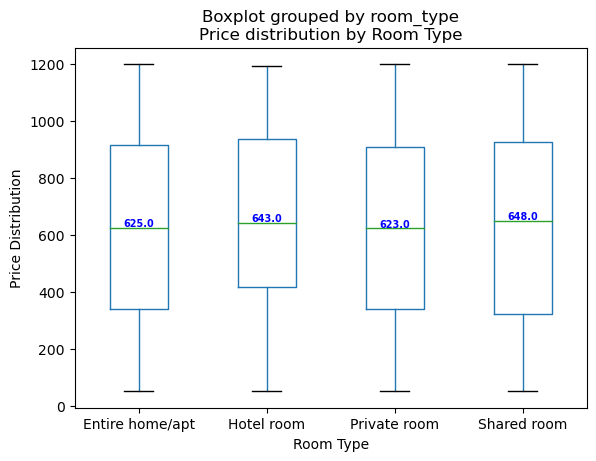

In [193]:
# Create the box/whisker graph for price distribution by room type
boxplot_graph = airbnb_data.boxplot(by="room_type", column=["price"], grid=False)

# Ensure proper labels and title
boxplot_graph.set(title="Price distribution by Room Type")
boxplot_graph.set(xlabel='Room Type', ylabel='Price Distribution')

# Calculate median to position labels
medians = airbnb_data.groupby(['room_type'])['price'].median().values
 
# Add it to the plot
pos = range(len(medians))
for tick,label in zip(pos, boxplot_graph.get_xticklabels()):
    boxplot_graph.text(pos[tick] + 1,  # x position
                       medians[tick] + 5, # y position
                       medians[tick],  # display the median value
                       horizontalalignment='center',
                       size='x-small',
                       color='b',
                       weight='semibold')

## Task 5b: Data Visualization (Any Tool)

- Create a scatter plot to illustrate the relationshi between the cleaning fee and the room price and write down the kind of correlation, if any, that you see.
- Create a line chart to showcase the total amount of listings available per year.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.

## Task 5c: Data Visualization (Any Tool)

- Create a data visualization of your choosing using one of the review columns in isolation or in combination with another column.
- Create a visualization to compare at least two different variables between super hosts and regular hosts.

If using Python for this exercise, please include the code in the cells below. If using any other tool, please include screenshoots of your work.